In [131]:
import math

import numpy as np

from sklearn import preprocessing as pre, pipeline
from sklearn import cluster, linear_model as lm
from sklearn import model_selection as ms

import walsdata
from walsdata import s229d, s280d
import langmap

### Trying to make geographical groups

In [3]:
s229d.langs

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family,Subfamily,Genus,ISO_codes,Samples_100,Samples_200,geometry
8,abk,Abkhaz,NaN,43.083333,41.000000,abkh1244,abk,Northwest Caucasian,NaN,Northwest Caucasian,abk,True,True,POINT (41.00000 43.08333)
34,aeg,Arabic (Egyptian),NaN,30.000000,31.000000,egyp1253,arz,Afro-Asiatic,NaN,Semitic,arz,True,True,POINT (31.00000 30.00000)
54,ain,Ainu,NaN,43.000000,143.000000,ainu1240,ain,NaN,NaN,NaN,ain,False,True,POINT (143.00000 43.00000)
66,akn,Akan,NaN,6.500000,-1.250000,akan1250,aka,Niger-Congo,NaN,Kwa,aka,False,False,POINT (-1.25000 6.50000)
70,ala,Alamblak,NaN,-4.666667,143.333333,alam1246,amp,Sepik,NaN,Sepik Hill,amp,True,True,POINT (143.33333 -4.66667)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,yko,Yukaghir (Kolyma),NaN,65.750000,150.833333,sout2750,yux,Yukaghir,NaN,Yukaghir,yux,False,True,POINT (150.83333 65.75000)
2609,yor,Yoruba,NaN,8.000000,4.333333,yoru1245,yor,Niger-Congo,Benue-Congo,Defoid,yor,True,True,POINT (4.33333 8.00000)
2620,yuc,Yuchi,NaN,35.750000,-86.750000,yuch1247,yuc,NaN,NaN,NaN,yuc,False,True,POINT (-86.75000 35.75000)
2625,yur,Yurok,NaN,41.333333,-124.000000,yuro1248,yur,Algic,NaN,Yurok,yur,False,True,POINT (-124.00000 41.33333)


In [4]:
dbscan = cluster.DBSCAN(metric='haversine', eps=0.12, min_samples=3)

In [5]:
labels = dbscan.fit_predict(s280d.langs[['Latitude', 'Longitude']].applymap(math.radians))

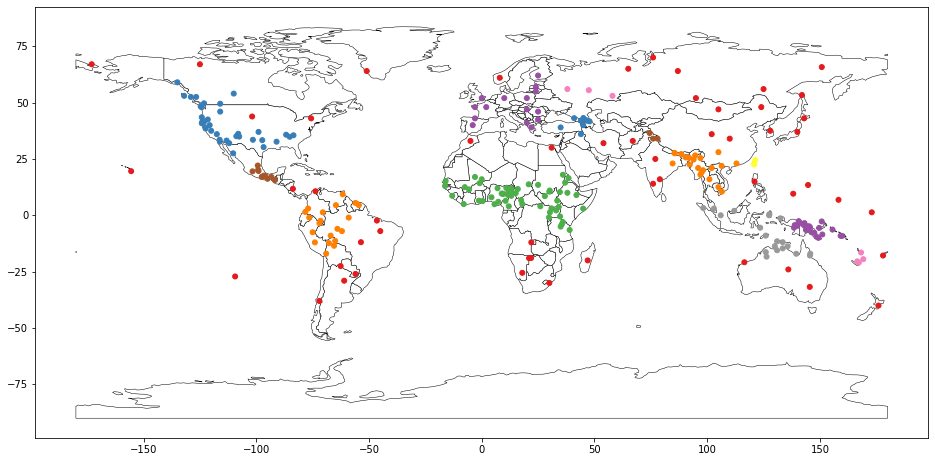

In [6]:
langmap.plot(s280d.langs, labels=labels)

In [7]:
labels

array([ 0,  1,  2, -1, -1,  3,  4,  5,  4,  3, -1,  6,  3, -1,  7,  6,  1,
        1,  4,  4,  8,  6,  6,  3,  3,  7,  2,  3,  3,  3, 14, -1,  5,  7,
       11,  5,  5,  9,  2,  6,  6, -1,  2, -1, 10, 11, 10,  2, -1,  7,  2,
        2,  6,  6,  4, -1,  2,  3,  3,  4,  3, 12, 13,  5,  6, -1,  3,  3,
       -1,  5,  5,  3,  3,  7,  3,  1,  5, 13,  3,  5, -1,  0,  2,  4,  3,
       -1, -1,  6,  7, 10,  5,  2, 10,  1, 12, 14,  3,  3,  3, -1,  4, 14,
        1,  3, 10,  7, -1, -1,  9, 13,  3,  3, -1,  4,  3, -1,  7, -1,  7,
        2,  4,  2,  4,  7, -1,  3,  3,  3,  2,  4, -1, -1,  1,  2,  3,  3,
        7, -1,  2,  4,  2,  7,  9,  7,  3,  5,  4, 12,  7,  1,  5, -1,  3,
        3, -1,  3,  3,  2, -1, -1, -1,  2, 13, 13,  7, -1, 13, -1,  2,  3,
        3,  3, -1,  2,  3,  7, 10, 13,  4,  2,  6,  7,  2, -1,  3, 10, -1,
        3,  3, -1,  3, -1, 13,  7, -1,  2,  3, 10,  8,  6, 12, -1,  5,  6,
       -1, -1,  2, 10,  2, -1, -1,  6,  5,  8, 11,  3,  3,  6, -1, 14,  6,
        4,  3,  5,  2,  4

### Getting families and regions ready for supervised learning

In [16]:
origins280 = s280d.langs[['ID', 'Family', 'Genus']].set_index('ID')
origins280.index.name = 'Language_ID'
origins280.columns = ['family', 'genus']
origins280['region'] = labels

In [17]:
origins280

,family,genus,region
Language_ID,,,
abi,Guaicuruan,South Guaicuruan,0
abk,Northwest Caucasian,Northwest Caucasian,1
aco,Keresan,Keresan,2
aeg,Afro-Asiatic,Semitic,-1
ain,NaN,NaN,-1
...,...,...,...
yur,Algic,Yurok,2
zan,Niger-Congo,Ubangi,3
zqc,Mixe-Zoque,Mixe-Zoque,10


In [19]:
origins229 = s229d.langs[['ID', 'Family', 'Genus']].set_index('ID')
origins229.index.name = 'Language_ID'
origins229.columns = ['family', 'genus']
origins229['region'] = origins280.region

In [20]:
origins229

,family,genus,region
Language_ID,,,
abk,Northwest Caucasian,Northwest Caucasian,1
aeg,Afro-Asiatic,Semitic,-1
ain,NaN,NaN,-1
akn,Niger-Congo,Kwa,3
ala,Sepik,Sepik Hill,4
...,...,...,...
yko,Yukaghir,Yukaghir,-1
yor,Niger-Congo,Defoid,3
yuc,NaN,NaN,2


Now I want to discard any groups that are too small to provide good estimates.

In [55]:
origins = origins280

In [56]:
min_group_size = 5

In [57]:
family_counts = origins.family.value_counts()

In [58]:
good_family_counts = family_counts[family_counts >= min_group_size]
good_family_counts

Austronesian         26
Niger-Congo          23
Indo-European        20
Sino-Tibetan         15
Afro-Asiatic         15
Trans-New Guinea     11
Altaic                8
Uto-Aztecan           6
Eastern Sudanic       6
Austro-Asiatic        6
Pama-Nyungan          5
Penutian              5
Nakh-Daghestanian     5
Name: family, dtype: int64

In [59]:
good_families = list(good_family_counts.index)

In [60]:
genus_counts = origins.genus.value_counts()

In [61]:
good_genus_counts = genus_counts[genus_counts >= min_group_size]
good_genus_counts

Oceanic    13
Bantoid     6
Name: genus, dtype: int64

In [62]:
good_genera = list(good_genus_counts.index)

In [69]:
region_counts = origins.region[origins.region >= 0].value_counts()

In [70]:
good_region_counts = region_counts[region_counts >= min_group_size]
good_region_counts

3     55
2     37
4     25
7     21
6     20
13    16
5     15
1     10
10    10
Name: region, dtype: int64

In [103]:
good_regions = sorted(list(good_region_counts.index))

In [104]:
origins_good = origins.copy()

In [105]:
origins_good.family = origins_good.family.where(
    origins_good.family.isin(good_families), np.nan
)
origins_good.genus = origins_good.genus.where(
    origins_good.genus.isin(good_genera), np.nan
)
origins_good.region = origins_good.region.where(
    origins_good.region.isin(good_regions), -1
)

In [106]:
origins_good

,family,genus,region
Language_ID,,,
abi,NaN,NaN,-1
abk,NaN,NaN,1
aco,NaN,NaN,2
aeg,Afro-Asiatic,NaN,-1
ain,NaN,NaN,-1
...,...,...,...
yur,NaN,NaN,2
zan,Niger-Congo,NaN,3
zqc,NaN,NaN,10


### Train-test split

In [107]:
values = s280d.values_scaled_imputed.reindex(origins_good.index)

In [108]:
values_train, values_test, origins_train, origins_test = (
    ms.train_test_split(values, origins_good, random_state=5312)
)

In [109]:
values_train

,1A,2A,3A,4A_2,4A_3,5A_1,5A_3,5A_4,6A_2,6A_3,...,143A_5,143A_6,143G_1,143G_2,143G_3,144A_1,144A_2,144A_3,144A_4,144A_5
Language_ID,,,,,,,,,,,,,,,,,,,,,
lah,0.75,1.0,0.50,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
anc,0.75,1.0,0.75,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
san,0.75,1.0,0.50,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
bur,1.00,0.5,1.00,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
iaa,1.00,1.0,0.50,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
asm,0.00,0.5,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
wic,0.50,0.0,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
yar,0.00,0.5,0.25,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [110]:
origins_train

,family,genus,region
Language_ID,,,
lah,Sino-Tibetan,NaN,7
anc,Afro-Asiatic,NaN,3
san,Niger-Congo,NaN,3
bur,NaN,NaN,-1
iaa,Austronesian,Oceanic,-1
...,...,...,...
asm,Trans-New Guinea,NaN,4
wic,NaN,NaN,2
yar,NaN,NaN,4


### Logistic regression on some features

In [152]:
def logistic_origins(feature):
    onehot = pre.OneHotEncoder(
        categories=[good_families, good_genera, good_regions],
        handle_unknown='ignore',
    )

    logreg = lm.LogisticRegression(random_state=5364)

    model = pipeline.Pipeline([
        ('onehot', onehot),
        ('clf', logreg),
    ])

    def force_binary(series):
        return series.round().astype(int)
    
    train = force_binary(values_train[feature])
    test = force_binary(values_test[feature])
    
    model.fit(origins_train, train)
    
    train_score = model.score(origins_train, train)
    test_score = model.score(origins_test, test)
    intercept = logreg.intercept_
    coefs = logreg.coef_
    neutral_prob = logreg.predict_proba(np.full(logreg.coef_.shape, 0.0))[0, 1]
    train_prob = train[train == 1].count() / train.count()

    return train_score, test_score, intercept, coefs, neutral_prob, train_prob

In [153]:
logistic_origins('81A_1')

(0.7619047619047619,
 0.6857142857142857,
 array([-0.01368965]),
 array([[-1.95358395, -1.68912515, -0.39921454,  0.52880559, -0.09358826,
          0.95590291,  1.36648567,  0.55402733, -0.99007154, -0.82653894,
         -0.37461495, -0.48278419,  0.52718842, -0.97966622, -0.37730792,
          0.51367365, -0.36730312, -0.39499977,  1.40964887, -1.29107275,
          0.32857585, -0.19273809, -1.51788884, -1.25408104]]),
 0.4965776403444772,
 0.4095238095238095)

In [154]:
logistic_origins('81A_2')

(0.8047619047619048,
 0.7714285714285715,
 array([-1.28302115]),
 array([[ 0.36377503,  2.23384766,  0.42747583, -0.02402258,  0.5412888 ,
         -0.81573376, -0.75670658,  0.3230912 , -0.45930436,  0.57430196,
         -0.01798154, -0.22260932, -0.21706852,  0.76614449,  0.5415447 ,
         -0.60402173, -1.56264575,  0.85593035, -0.4259274 ,  1.62735651,
         -0.38337818,  0.90063651,  0.46980746,  0.79465754]]),
 0.21703639504443578,
 0.3142857142857143)

In [156]:
logistic_origins('81A_3')

(0.9142857142857143,
 0.9857142857142858,
 array([-2.69880945]),
 array([[ 1.39959118, -0.63901832, -0.36332408, -0.36420459,  0.01510398,
         -0.235632  , -0.31790849, -0.48166979,  1.57067818, -0.13216006,
         -0.186158  ,  0.15525509, -0.0938125 ,  0.26228564, -0.13419054,
         -0.21913536,  0.95035816,  0.21262547, -0.88740866, -0.28583988,
         -0.55683622, -0.39466732,  0.90687786, -0.68512585]]),
 0.06304364450408129,
 0.08571428571428572)

In [157]:
logistic_origins('81A_4')

(0.9761904761904762,
 0.9571428571428572,
 array([-3.79748698]),
 array([[ 0.36279057, -0.18879286, -0.16835775, -0.17486562, -0.16273921,
         -0.14746322, -0.133103  , -0.16682498, -0.06287952, -0.05526672,
         -0.09262242, -0.06912871, -0.03856673, -0.26771112, -0.05555402,
         -0.09313264, -0.40059191, -0.50303948, -0.35357297, -0.13343457,
          0.47690306, -0.19056846,  1.93913618,  0.49667941]]),
 0.021935120542456214,
 0.023809523809523808)

In [158]:
logistic_origins('81A_5')

(0.9857142857142858,
 0.9857142857142858,
 array([-4.25302869]),
 array([[-0.29833398, -0.14075413, -0.11657878, -0.12277711, -0.11956054,
         -0.10904792, -0.0891467 , -0.05204651, -0.04626028, -0.03721861,
         -0.086974  , -0.0500859 , -0.02571206, -0.10674689, -0.03967699,
         -0.06271559, -0.2901084 , -0.37439644, -0.24168022, -0.09263016,
          0.61539778, -0.13390024, -0.10093505,  1.36043469]]),
 0.014021693511948822,
 0.014285714285714285)

In [155]:
logistic_origins('19A_5')

(0.8904761904761904,
 0.9428571428571428,
 array([-2.207355]),
 array([[ 0.75777874, -0.40246841,  0.29300673,  0.3026279 , -0.72957644,
         -0.31052798,  0.20276027, -0.45766552,  0.28412571, -0.27101974,
          0.47489994, -0.3180808 , -0.12533373,  0.37688316,  0.52847425,
         -0.37280447, -0.16378885,  0.13405973, -1.02085516,  0.48997834,
         -0.21840168,  0.24502709,  1.48200818, -0.79057419]]),
 0.09909194949941243,
 0.10952380952380952)